In [1]:
# Importing libraries

import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Loading data
df = pd.read_csv("data/final_dataset.csv")
df.shape

(6080, 43)

In [2]:
df.head(5)

,Unnamed: 0,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,...,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts,DiffLP
0,0,2000-08-19,Charlton,Man City,4,0,H,0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
1,1,2000-08-19,Chelsea,West Ham,4,2,H,0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,-4.0
2,2,2000-08-19,Coventry,Middlesbrough,1,3,NH,0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0
3,3,2000-08-19,Derby,Southampton,2,2,NH,0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0
4,4,2000-08-19,Leeds,Everton,2,0,H,0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,-10.0


In [3]:
df.isnull().values.any()

False

## Checking for feature correlations

In [4]:
def plot_corr(df, size=20):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  Blue-cyan-yellow-red-darkred => less to more correlated
                                                0 ------------------>  1
                                                Expect a darkred line running from top left to bottom right
    """

    corr = df.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks

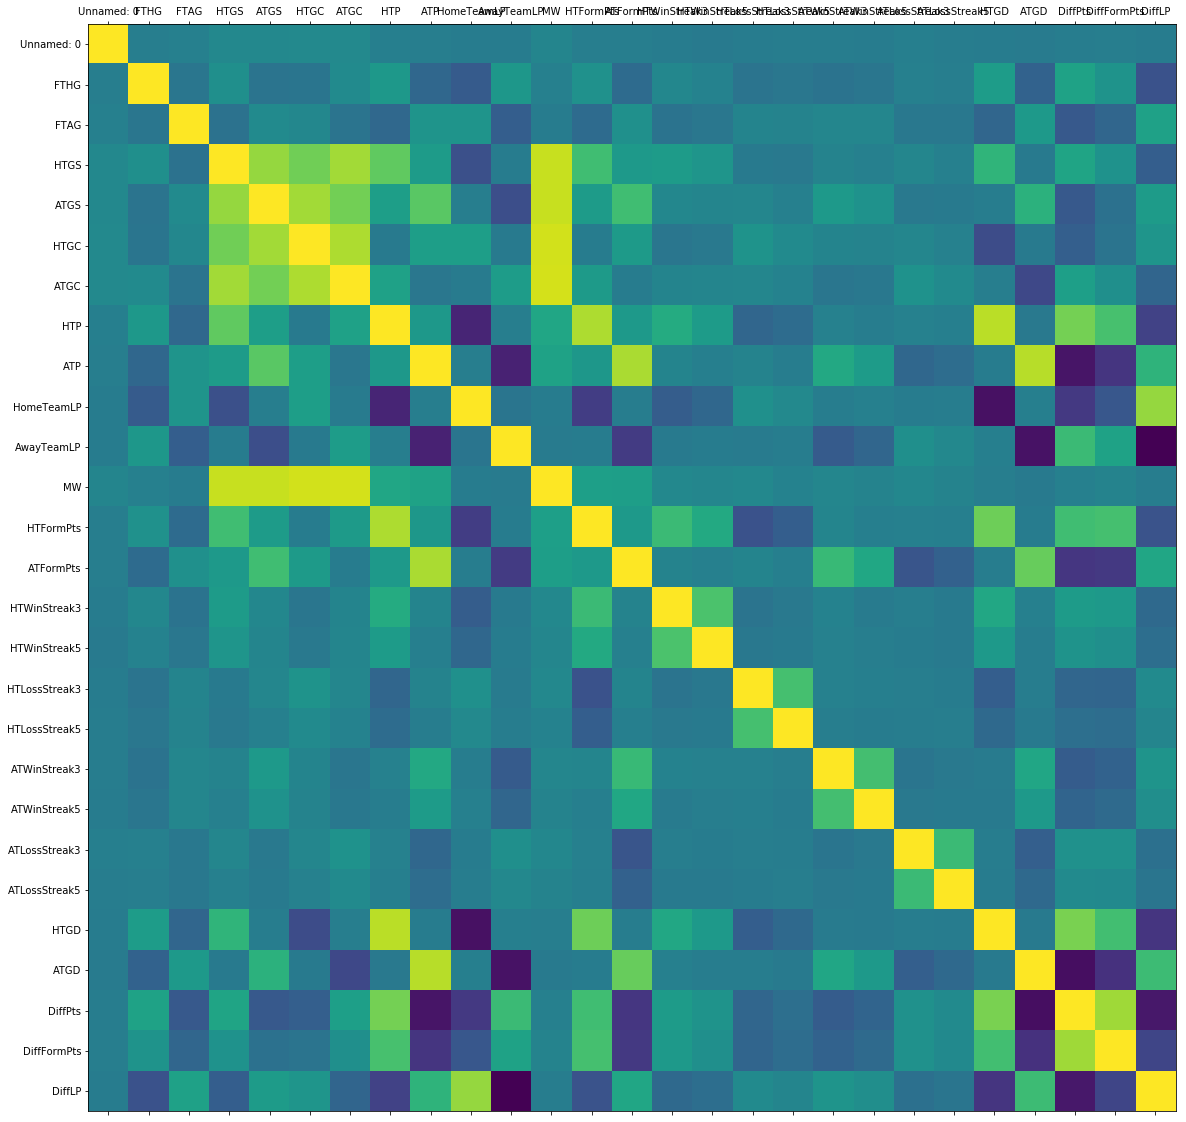

In [5]:
plot_corr(df)

## Removing features that are correlated or not relevant

In [6]:
del df['Unnamed: 0']
del df['MW']
del df['Date']
del df['HomeTeam']
del df['AwayTeam']

del df['HTFormPtsStr']
del df['ATFormPtsStr']
del df['HM1']
del df['HM2']
del df['HM3']
del df['HM4']
del df['HM5']
del df['AM1']
del df['AM2']
del df['AM3']
del df['AM4']
del df['AM5']


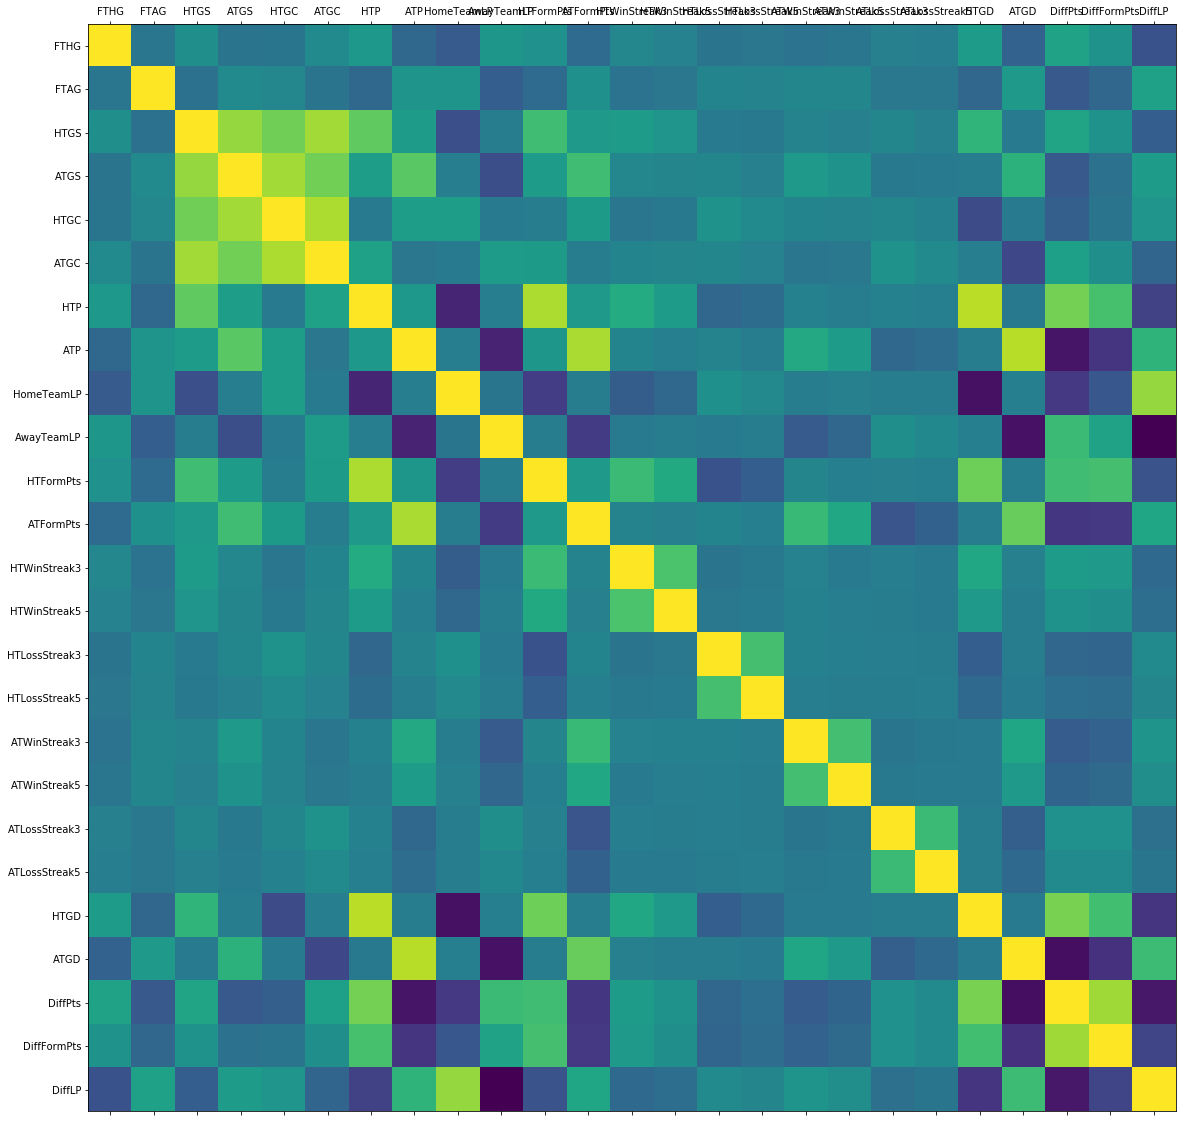

In [7]:
plot_corr(df)

## Preparing data
Setting the FTR-values (Full Time Result) to H, D or A depending on the Home goals and Away goals.

In [8]:
for index, row in df.iterrows():
    hg = row['FTHG']
    ag = row['FTAG']
    ftr = 'D'
    
    if hg > ag:
        ftr = 'H'
    elif hg < ag:
        ftr = 'A'
        
    df.at[index,'FTR'] = ftr    
    
df.tail(5)

,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HomeTeamLP,...,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts,DiffLP
6075,2,1,H,39,64,54,49,1.263158,1.631579,9.0,...,0,0,0,0,0,-0.394737,0.394737,-0.368421,-0.236842,-3.0
6076,1,1,D,41,70,51,40,1.210526,1.710526,8.0,...,0,0,0,0,0,-0.263158,0.789474,-0.500000,0.026316,6.0
6077,2,2,D,38,46,48,60,1.157895,1.000000,18.0,...,0,0,0,0,0,-0.263158,-0.368421,0.157895,-0.131579,2.0
6078,1,1,D,33,62,47,49,1.105263,1.552632,13.0,...,0,0,0,0,0,-0.368421,0.342105,-0.447368,-0.157895,7.0
6079,3,1,H,46,44,34,64,1.657895,1.105263,4.0,...,0,0,0,0,0,0.315789,-0.526316,0.552632,0.157895,-14.0


In [9]:
homewins = len(df.loc[df['FTR'] == 'H'])
print("Number of home wins:  {0} ({1:2.2f}%)".format(homewins, (homewins/len(df)) * 100))

Number of home wins:  2816 (46.32%)


## Preprocess features

## Split data
70% for training and 30% for test

In [10]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

x = df.values #returns a numpy array

# HTP - Home team avg points
# ATP - Away team avg points

# Adding feature columns
feature_columns = ['HTP', 'ATP', 'HTFormPts', 'ATFormPts', 'DiffFormPts']
outcome_columns = ['FTR']

x = df[feature_columns].values
y = df[outcome_columns].values

# Preprocessing feature values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

split_test_size = 0.30

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=split_test_size, random_state=28)


In [11]:
print("{0:0.2f}% in training set".format((len(x_train)/len(df.index)) * 100))
print("{0:0.2f}% in test set".format((len(x_test)/len(df.index)) * 100))

70.00% in training set
30.00% in test set


In [12]:
print("Original Homewins  : {0} ({1:0.2f}%)".format(len(df.loc[df['FTR'] == 'H']), (len(df.loc[df['FTR'] == 'H'])/len(df.index)) * 100.0))
print("")
print("Training Homewins  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 'H']), (len(y_train[y_train[:] == 'H'])/len(y_train) * 100.0)))
print("")
print("Test Homewins      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 'H']), (len(y_test[y_test[:] == 'H'])/len(y_test) * 100.0)))

Original Homewins  : 1568 (25.79%)

Training Homewins  : 1111 (26.10%)

Test Homewins      : 457 (25.05%)


## Training

In [13]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm

nb_model = GaussianNB()
rf_model = RandomForestClassifier(random_state=28)
lr_model = LogisticRegression(C=0.7, random_state=28)
svm_model = svm.SVC()


nb_model.fit(x_train, y_train.ravel())
rf_model.fit(x_train, y_train.ravel())
lr_model.fit(x_train, y_train.ravel())
svm_model.fit(x_train, y_train.ravel())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Training data performance 

In [14]:
# import the performance metrics library
from sklearn import metrics

# predict values using the training data
nb_predict_train = nb_model.predict(x_train)
rf_predict_train = rf_model.predict(x_train)
lr_predict_train = lr_model.predict(x_train)
svm_predict_train = svm_model.predict(x_train)

# Accuracy
print("Accuracy NB: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))
print("Accuracy RF: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))
print("Accuracy LR: {0:.4f}".format(metrics.accuracy_score(y_train, lr_predict_train)))
print("Accuracy SVM: {0:.4f}".format(metrics.accuracy_score(y_train, svm_predict_train)))
print()

Accuracy NB: 0.5040
Accuracy RF: 0.9218
Accuracy LR: 0.5125
Accuracy SVM: 0.5120



### Testing data performance

In [15]:
# predict values using the testing data
nb_predict_test = nb_model.predict(x_test)
rf_predict_test = rf_model.predict(x_test)
lr_predict_test = lr_model.predict(x_test)
svm_predict_test = svm_model.predict(x_test)

# training metrics
print("Accuracy NB: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))
print("Accuracy RF: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))
print("Accuracy LR: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print("Accuracy SVM: {0:.4f}".format(metrics.accuracy_score(y_test, svm_predict_test)))


Accuracy NB: 0.4962
Accuracy RF: 0.4457
Accuracy LR: 0.5071
Accuracy SVM: 0.5115


In [16]:

print("Confusion Matrix NB")
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test)))
print("")

print("Classification Report NB")
print(metrics.classification_report(y_test, nb_predict_test))


print("Confusion Matrix LR")
print("{0}".format(metrics.confusion_matrix(y_test, lr_predict_test)))
print("")

print("Classification Report LR")
print(metrics.classification_report(y_test, lr_predict_test))

Confusion Matrix NB
[[228  14 276]
 [149  11 297]
 [171  12 666]]

Classification Report NB
             precision    recall  f1-score   support

          A       0.42      0.44      0.43       518
          D       0.30      0.02      0.04       457
          H       0.54      0.78      0.64       849

avg / total       0.44      0.50      0.43      1824

Confusion Matrix LR
[[200   0 318]
 [114   0 343]
 [124   0 725]]

Classification Report LR
             precision    recall  f1-score   support

          A       0.46      0.39      0.42       518
          D       0.00      0.00      0.00       457
          H       0.52      0.85      0.65       849

avg / total       0.37      0.51      0.42      1824



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
